<h2><b>Dynamic Tactical Asset Allocation in HK market</b></h2>

According to the thesis "Quantitative Methods of Dynamic Tactical Asset Allocation" written by Mohamed Aziz Zardi, in a multi assets market, he proposed several singal based and risked based asset allocation methods which can protect portfolio during market fall and some can produce higher return along with higher risk. Now I try to replicate those methods and apply into Hong Kong market with some modifications:

| Name of Strategy| How its work|Signal | Asset allocation|
|:---------|:--------:|:------:|:------:|
|  SMA |  <b>250 days </b> simple moving average  |  Asset price >= SMA ==>  <b>Positive ==> Buy </b> <br> <br> Asset price < SMA ==> <b>Negative  ==>  Close all position and hold cash </b>  |  Positive ==>100% Risky Assets 0% Cash <br>  Negative ==> 0% Risky Assets 100% Cash <br><br>Each Risky asset has its own asset allocation <br> either 25% of the portfolio or 0%|
|  SMA Plus |  SMA with comparsion between short term volatility <br> and long term volatility   | <b>High Volatility</b> for 20 days Volatility >= 250 days volatility *150%  <br><br>  <b> Low Volatility </b> for 20 days Volatility < 250 days volatility *150% | Positive Trend and Low Volatility  ==> 100% Risky Assets 0% Cash <br> Positive Trend and High Volatility ==> 70% Risky Assets 30% Cash  <br> Negative Trend and Low Volatility ==> 30% Risky Assets 70% Cash   <br> Negative Trend and High Volatility ==> 0% Risky Assets 100% Cash <br><br> Each Risky asset has its own asset allocation, at most 25% of the portfolio| 
|Dynamic Tactical Asset Allocation (DTAA)| SMA Plus with different asset allocation to match different market environment | Aggregate the trend and volatility signals from all asset classes to two collective signals Trend and Volatility |Positive Trend and Low Volatility <br> Equities 45%  Fixed Income 25%  Commodities 15% Real Estate 15% <br> <br> Positive Trend and high Volatility <br> Equities 40%  Fixed Income 30%  Commodities 15% Real Estate 15% <br> <br>Negative Trend and Low Volatility <br> Equities 30%  Fixed Income 40%  Commodities 10% Real Estate 20% <br><br> Negative Trend and High Volatility <br> Equities 20%  Fixed Income 50%  Commodities 5% Real Estate 25% |
|  Risk parity   |  Distribute risk evenly across various asset classes to achieve a balanced and resilient portfolio  | NA   |  Adjust weekly <br> no leverage no shortselling, only between  0% and 100% weighting|




Equities: I use <b> Hang Seng Index (HSI)</b> as this index has the largest market cap and actively traded stocks in HK market.

Fixed Income: I choose a <b> HKD bond fund</b> from a Mandatory Provident Fund Scheme (retirement plan like 401K in US) as fixed income investment is not popular HK thus I have to choose a large fund that is more actively traded.

Commodities: I use <b> 2840.HK SPDR® Gold Shares (US ticker GLD) </b> as this ETF is the largest, most common commodities trading tool in HK using HKD as trading currency. Other commodities including oil and iron ore in HK are either illiquid or have few trading history in HK.

Real Estate: I use <b> 823.HK Link REIT </b> as it is the largest REIT in HK and Asia, it holds many shopping malls in HK for rental income. Started from its IPO on 2005, its ability to renovate old shopping malls into new and fancy thus exponentially increasing rent is famous around the world and that provides huge capital gain and dividend growth to its investors continuously. Even though 823.HK is not a property developer in HK, I think it is a good proxy of HK real estate market as most people in HK care about both the rental yield and asset appreciation of properties.<em> <u> Note that 823.HK is a constituent stock of HSI, thus the price performance is somehow correlated to HSI. </em> </u>

Cash or Risk Free Rate: I use <b> Overnight HIBOR Rate </b> as a proxy of risk free rate, representing investor cash out and put money into money market funds for safe haven. 

All data are obtained from LSEG Workspace. Data range from 2010/11/01 to 2024/11/15, return calculation started from 2011/11/01 to 2024/11/15. For simplicity the reinvestment of dividend or any effect of corporate actions is ignored.

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 30)
data = pd.read_excel("D:/project/DTAA data 3.xlsx")
data["Date"] = pd.to_datetime(data['Date'])
data.set_index("Date", inplace=True)
# data download link :   https://docs.google.com/spreadsheets/d/1uf38KCtFQGtK0LH5xQERpr1ZV1bnxikh/edit?usp=sharing&ouid=114485432635242415083&rtpof=true&sd=true

In [2]:
data_sma = data[::-1].copy()
for column in data_sma.columns[:4]:
    name = column + "_250_SMA"
    data_sma[name] = data_sma[column].rolling(window=250).mean()
    name = column + "_daily_return"
    data_sma[name] = (data_sma[column] / data_sma[column].shift(1)) -1

data_sma["Cash_daily_return"] = (1 + data_sma['Overnight HIBOR'] / 100) ** (1/365) -1


<b>250 days SMA Strategy </b>

In [3]:
data_sma_return = data_sma[249:].copy()
data_sma_return["portfolio_daily_return"] =  (np.where(data_sma_return["HKD bond fund"] >= data_sma_return["HKD bond fund_250_SMA"], data_sma_return["HKD bond fund_daily_return"].shift(-1), data_sma_return['Cash_daily_return'].shift(-1)) 
                                              + np.where(data_sma_return["Gold ETF"] >= data_sma_return["Gold ETF_250_SMA"], data_sma_return["Gold ETF_daily_return"].shift(-1), data_sma_return['Cash_daily_return'].shift(-1)) 
                                              + np.where(data_sma_return["HSI"] >= data_sma_return["HSI_250_SMA"], data_sma_return["HSI_daily_return"].shift(-1), data_sma_return['Cash_daily_return'].shift(-1))  
                                              + np.where(data_sma_return["Link REIT"] >= data_sma_return["Link REIT_250_SMA"], data_sma_return["Link REIT_daily_return"].shift(-1), data_sma_return['Cash_daily_return'].shift(-1)) )  /4
data_sma_return

,HKD bond fund,Gold ETF,HSI,Link REIT,Overnight HIBOR,HKD bond fund_250_SMA,HKD bond fund_daily_return,Gold ETF_250_SMA,Gold ETF_daily_return,HSI_250_SMA,HSI_daily_return,Link REIT_250_SMA,Link REIT_daily_return,Cash_daily_return,portfolio_daily_return
Date,,,,,,,,,,,,,,,
2011-11-02,13.119,1308.0,19733.71,26.578867,0.05000,12.761804,0.002139,1155.892,0.009259,22179.15640,0.018779,24.716500,-0.005455,0.000001,0.002304
2011-11-03,13.154,1307.0,19242.50,26.773228,0.05000,12.763116,0.002668,1156.992,-0.000765,22161.51464,-0.024892,24.729911,0.007313,0.000001,-0.000139
2011-11-04,13.120,1331.0,19842.79,26.335916,0.05000,12.764308,-0.002585,1158.208,0.018363,22146.20012,0.031196,24.740989,-0.016334,0.000001,0.002464
2011-11-07,13.122,1339.0,19677.89,26.433096,0.05000,12.765500,0.000152,1159.456,0.006011,22128.33300,-0.008310,24.752262,0.003690,0.000001,0.003709
2011-11-08,13.141,1352.0,19678.47,26.530277,0.05000,12.766700,0.001448,1160.748,0.009709,22108.90436,0.000029,24.763341,0.003676,0.000001,0.008491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-11,15.134,1914.0,20426.93,36.400000,4.47524,14.794940,-0.001320,1659.978,-0.008290,17660.41576,-0.014534,36.543800,0.000000,0.000120,-0.014115
2024-11-12,15.111,1863.0,19846.88,36.350000,3.82345,14.799148,-0.001520,1661.678,-0.026646,17667.93692,-0.028396,36.531200,-0.001374,0.000103,0.000789
2024-11-13,15.102,1872.0,19823.45,36.000000,3.81964,14.803476,-0.000596,1663.456,0.004831,17676.55008,-0.001181,36.523600,-0.009629,0.000103,-0.009305


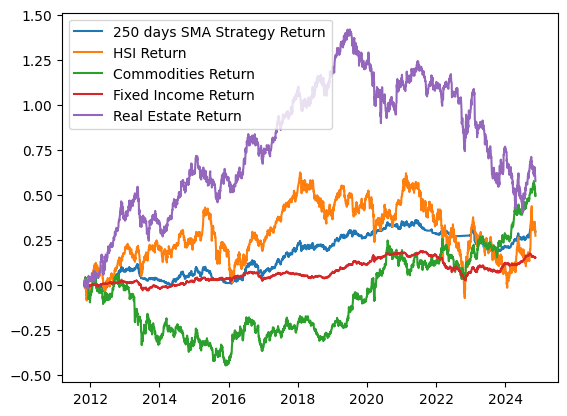

In [4]:
plt.plot(data_sma_return["portfolio_daily_return"].cumsum(), label="250 days SMA Strategy Return")
plt.plot(data_sma_return["HSI_daily_return"].cumsum(), label= "HSI Return")
plt.plot(data_sma_return['Gold ETF_daily_return'].cumsum(), label= "Commodities Return")
plt.plot(data_sma_return["HKD bond fund_daily_return"].cumsum(), label="Fixed Income Return")
plt.plot(data_sma_return["Link REIT_daily_return"].cumsum(), label= "Real Estate Return")
plt.legend()

In [5]:
portfolio_return = data_sma_return["portfolio_daily_return"][:-1].cumsum().iloc[-1]
print("SMA Plus Strategy Return: ", portfolio_return)
risk=data_sma_return["portfolio_daily_return"].std()
print("Sharpe Ratio is : ", data_sma_return["portfolio_daily_return"].mean() / risk * np.sqrt(250))

SMA Plus Strategy Return:  0.292779631839187
Sharpe Ratio is :  0.3687755514091709


Turns out using SMA strategy is less volatile and in the end by holding a multi-assets portfolio you will get similar return with HSI with less risk.

How about we also consider volatility of the assets and adjust my holding accordingly?  

<b>SMA Plus Strategy </b>

In [6]:
data_sma

,HKD bond fund,Gold ETF,HSI,Link REIT,Overnight HIBOR,HKD bond fund_250_SMA,HKD bond fund_daily_return,Gold ETF_250_SMA,Gold ETF_daily_return,HSI_250_SMA,HSI_daily_return,Link REIT_250_SMA,Link REIT_daily_return,Cash_daily_return
Date,,,,,,,,,,,,,,
2010-11-01,12.826,1032.0,23652.94,23.420501,0.09643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000003
2010-11-02,12.822,1027.0,23671.42,23.566271,0.07607,NaN,-0.000312,NaN,-0.004845,NaN,0.000781,NaN,0.006224,0.000002
2010-11-03,12.824,1027.0,24144.67,23.614862,0.05821,NaN,0.000156,NaN,0.000000,NaN,0.019992,NaN,0.002062,0.000002
2010-11-04,12.841,1029.0,24535.63,23.760632,0.05000,NaN,0.001326,NaN,0.001947,NaN,0.016192,NaN,0.006173,0.000001
2010-11-05,12.854,1052.0,24876.82,24.246535,0.05000,NaN,0.001012,NaN,0.022352,NaN,0.013906,NaN,0.020450,0.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-11,15.134,1914.0,20426.93,36.400000,4.47524,14.794940,-0.001320,1659.978,-0.008290,17660.41576,-0.014534,36.5438,0.000000,0.000120
2024-11-12,15.111,1863.0,19846.88,36.350000,3.82345,14.799148,-0.001520,1661.678,-0.026646,17667.93692,-0.028396,36.5312,-0.001374,0.000103
2024-11-13,15.102,1872.0,19823.45,36.000000,3.81964,14.803476,-0.000596,1663.456,0.004831,17676.55008,-0.001181,36.5236,-0.009629,0.000103


In [7]:
data_sma_plus = data[::-1].copy()
data_sma_plus["Cash_daily_return"] = (1 + data_sma_plus['Overnight HIBOR'] / 100) ** (1/365) -1
for column in data_sma_plus.columns[:4]:
    name = column + "_250_SMA"
    data_sma_plus[name] = data_sma_plus[column].rolling(window=250).mean()
    name1 = column + "_daily_return"
    data_sma_plus[name1] = (data_sma_plus[column] / data_sma_plus[column].shift(1)) -1
    name2 = column + "_20_days_volatility"
    name3 = column + "_250_days_volatility"
    data_sma_plus[name2] = data_sma_plus[name1].rolling(window=20).std() * np.sqrt(250)
    data_sma_plus[name3] = data_sma_plus[name1].rolling(window=250).std() *np.sqrt(250)
    name4 = column + "_strategy_return"
    data_sma_plus[name4] = np.where(
        (data_sma_plus[column] >= data_sma_plus[name]) & (data_sma_plus[name3] >= data_sma_plus[name2]), data_sma_plus[name1].shift(-1),  #Higher than 250 days SMA and low volatility
        np.where((data_sma_plus[column] >= data_sma_plus[name]) & (data_sma_plus[name3] < data_sma_plus[name2]), (data_sma_plus[name1].shift(-1) * 0.7 + data_sma_plus["Cash_daily_return"].shift(-1) * 0.3) ,   #Higher than 250 days SMA and high volatility
                 np.where((data_sma_plus[column] < data_sma_plus[name]) & (data_sma_plus[name3] >= data_sma_plus[name2]), (data_sma_plus[name1].shift(-1) * 0.3 + data_sma_plus["Cash_daily_return"].shift(-1) * 0.7) , #Lower than 250 days SMA and low volatility
                          data_sma_plus["Cash_daily_return"].shift(-1)))   #Lower than 250 days SMA and high volatility
    )

data_sma_plus=data_sma_plus[250:].copy()
data_sma_plus["portfolio_daily_return"]=data_sma_plus["HKD bond fund_strategy_return"]+ data_sma_plus["Gold ETF_strategy_return"] +data_sma_plus["HSI_strategy_return"] +data_sma_plus['Link REIT_strategy_return']

In [8]:
data_sma_plus

,HKD bond fund,Gold ETF,HSI,Link REIT,Overnight HIBOR,Cash_daily_return,HKD bond fund_250_SMA,HKD bond fund_daily_return,HKD bond fund_20_days_volatility,HKD bond fund_250_days_volatility,HKD bond fund_strategy_return,Gold ETF_250_SMA,Gold ETF_daily_return,Gold ETF_20_days_volatility,Gold ETF_250_days_volatility,Gold ETF_strategy_return,HSI_250_SMA,HSI_daily_return,HSI_20_days_volatility,HSI_250_days_volatility,HSI_strategy_return,Link REIT_250_SMA,Link REIT_daily_return,Link REIT_20_days_volatility,Link REIT_250_days_volatility,Link REIT_strategy_return,portfolio_daily_return
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-11-03,13.154,1307.0,19242.50,26.773228,0.05000,0.000001,12.763116,0.002668,0.035790,0.032933,-0.001809,1156.992,-0.000765,0.186543,0.201364,0.018363,22161.51464,-0.024892,0.348351,0.238570,0.000001,24.729911,0.007313,0.323878,0.197180,-0.011433,0.005122
2011-11-04,13.120,1331.0,19842.79,26.335916,0.05000,0.000001,12.764308,-0.002585,0.036543,0.033040,0.000107,1158.208,0.018363,0.193734,0.202020,0.006011,22146.20012,0.031196,0.348405,0.240690,0.000001,24.740989,-0.016334,0.325764,0.197825,0.002583,0.008702
2011-11-07,13.122,1339.0,19677.89,26.433096,0.05000,0.000001,12.765500,0.000152,0.033908,0.033040,0.001014,1159.456,0.006011,0.193854,0.202076,0.009709,22128.33300,-0.008310,0.351541,0.239923,0.000001,24.752262,0.003690,0.321716,0.197844,0.002574,0.013298
2011-11-08,13.141,1352.0,19678.47,26.530277,0.05000,0.000001,12.766700,0.001448,0.034010,0.033045,-0.000586,1160.748,0.009709,0.194520,0.202256,0.000000,22108.90436,0.000029,0.344879,0.239324,0.000001,24.763341,0.003676,0.301959,0.197789,0.024359,0.023775
2011-11-09,13.130,1352.0,20014.43,27.453491,0.05000,0.000001,12.767804,-0.000837,0.033888,0.033045,0.001973,1161.948,0.000000,0.194867,0.201139,-0.017751,22089.45480,0.017072,0.347240,0.239540,0.000001,24.776169,0.034799,0.297079,0.199751,-0.006194,-0.021971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-11,15.134,1914.0,20426.93,36.400000,4.47524,0.000120,14.794940,-0.001320,0.018684,0.033217,-0.001520,1659.978,-0.008290,0.138440,0.142440,-0.026646,17660.41576,-0.014534,0.265952,0.256206,-0.019847,36.543800,0.000000,0.221069,0.272142,-0.000340,-0.048352
2024-11-12,15.111,1863.0,19846.88,36.350000,3.82345,0.000103,14.799148,-0.001520,0.018266,0.033091,-0.000596,1661.678,-0.026646,0.167589,0.145105,0.003412,17667.93692,-0.028396,0.252774,0.257320,-0.001181,36.531200,-0.001374,0.213352,0.272101,-0.002817,-0.001180
2024-11-13,15.102,1872.0,19823.45,36.000000,3.81964,0.000103,14.803476,-0.000596,0.017224,0.032960,0.001192,1663.456,0.004831,0.164093,0.144909,-0.013243,17676.55008,-0.001181,0.252767,0.256757,-0.019555,36.523600,-0.009629,0.212646,0.269244,-0.004093,-0.035698


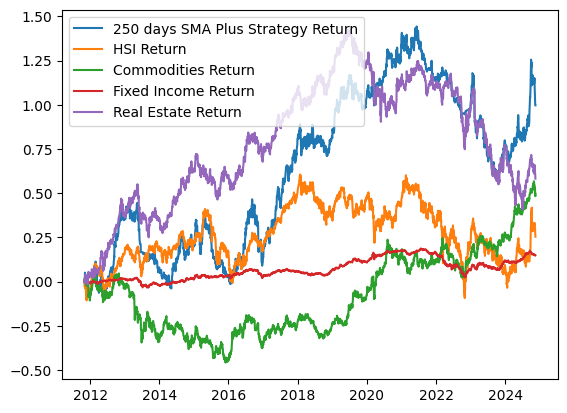

In [9]:
plt.plot(data_sma_plus["portfolio_daily_return"].cumsum(), label="250 days SMA Plus Strategy Return")
plt.plot(data_sma_plus["HSI_daily_return"].cumsum(), label= "HSI Return")
plt.plot(data_sma_plus['Gold ETF_daily_return'].cumsum(), label= "Commodities Return")
plt.plot(data_sma_plus["HKD bond fund_daily_return"].cumsum(), label="Fixed Income Return")
plt.plot(data_sma_plus["Link REIT_daily_return"].cumsum(), label= "Real Estate Return")
plt.legend()

In [10]:
portfolio_return = data_sma_plus["portfolio_daily_return"][:-1].cumsum().iloc[-1]
print("SMA Plus Strategy Return: ", portfolio_return)
risk=data_sma_plus["portfolio_daily_return"].std()
print("Sharpe Ratio is : ", data_sma_plus["portfolio_daily_return"].mean() / risk * np.sqrt(250))

SMA Plus Strategy Return:  0.9964833733252118
Sharpe Ratio is :  0.33259316511068343


Seems like SMA Plus Strategy is a simple strategy that can improve the return of a multi-asset portfolio even though the sharpe ratio has not improved.

What if I consider trend and volatility of the whole portfolio to consider different weightings of each asset?



<b>Dynamic Tactical Asset Allocation (DTAA)</b>

Now we aggregate all four trends and signals into one trend signal and one volatility signal respectively. 

In the singal 50% weighting is equities, 20% fixed income, 15% commodities and 15% real estate. Since the thesis did not clear explain how to construct it, I decided to use the percentage difference. If the aggregate SMA percentage difference is larger than or equal to zero, it is a positive trend, otherwise it is a negative trend. Similar logic applies to volatility signal. 

Based on the singals we have 4 different asset allocation. Note that  cash out and hold cash is not an option here.

| Trend | Volatility | Asset Allocation |
|:---------|:--------:|---------:|
|  Positive  |  Low  |  Equities 45%   Fixed Income 25%   Commodities  15%   Real Estate 15%  |
|  Positive   |  High   |  Equities 40%   Fixed Income 30%   Commodities  15%   Real Estate 15%   |
|  Negative   |  Low   |  Equities 30%   Fixed Income 40%   Commodities  10%   Real Estate 20%  |
|  Negative   |  High   |  Equities 20%   Fixed Income 50%   Commodities  5%   Real Estate 25%   |


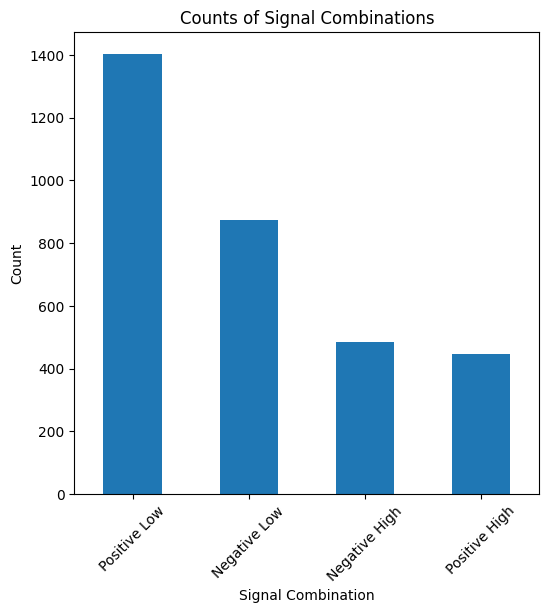

In [11]:
data_dtaa = data[::-1].copy()
for column in data_dtaa.columns[:4]:
    name = column + "_250_SMA"
    data_dtaa[name] = data_dtaa[column].rolling(window=250).mean()
    name1 = column + "_daily_return"
    data_dtaa[name1] = (data_dtaa[column] / data_dtaa[column].shift(1)) -1
    name2 = column + "_20_days_volatility"
    name3 = column + "_250_days_volatility"
    data_dtaa[name2] = data_dtaa[name1].rolling(window=20).std() * np.sqrt(250)
    data_dtaa[name3] = data_dtaa[name1].rolling(window=250).std() *np.sqrt(250)
    name4 = column + "_SMA_diff"
    data_dtaa[name4] = (data_dtaa[column]- data_dtaa[name]) / data_dtaa[name]
    name5 = column + "_Volatility_diff"
    data_dtaa[name5] = (data_dtaa[name3]- data_dtaa[name2]) / data_dtaa[name2]

data_dtaa = data_dtaa[250:].copy()
sma_columns = ["HKD bond fund_SMA_diff", "Gold ETF_SMA_diff", "HSI_SMA_diff", "Link REIT_SMA_diff"]
data_dtaa["SMA_signal"] = np.where(data_dtaa[sma_columns].sum(axis=1) >= 0, "Positive", "Negative")
vol_columns = ["HKD bond fund_Volatility_diff", "Gold ETF_Volatility_diff", "HSI_Volatility_diff", "Link REIT_Volatility_diff"]
data_dtaa["Vol_signal"] = np.where(data_dtaa[vol_columns].sum(axis=1) >= 0, "Low", "High")

data_dtaa["Combined_signal"] = data_dtaa["SMA_signal"] + " " + data_dtaa["Vol_signal"]
combination_counts = data_dtaa["Combined_signal"].value_counts() 
plt.figure(figsize=(6, 6)) 
combination_counts.plot(kind='bar') 
plt.title('Counts of Signal Combinations') 
plt.xlabel('Signal Combination') 
plt.ylabel('Count') 
plt.xticks(rotation=45) 
plt.show()

In [12]:
data_dtaa["portfolio_daily_return"]=np.where(
    data_dtaa["Combined_signal"] == "Positive Low", (data_dtaa['HKD bond fund_daily_return'].shift(-1) * 0.25 + data_dtaa['Gold ETF_daily_return'].shift(-1) * 0.15 + data_dtaa["HSI_daily_return"].shift(-1) * 0.45 + data_dtaa["Link REIT_daily_return"].shift(-1) * 0.15),
    np.where(data_dtaa["Combined_signal"] == "Positive High",(data_dtaa['HKD bond fund_daily_return'].shift(-1) * 0.3 + data_dtaa['Gold ETF_daily_return'].shift(-1) * 0.15 + data_dtaa["HSI_daily_return"].shift(-1) * 0.4 + data_dtaa["Link REIT_daily_return"].shift(-1) * 0.15),
             np.where(data_dtaa["Combined_signal"] == "Negative Low",(data_dtaa['HKD bond fund_daily_return'].shift(-1) * 0.4 + data_dtaa['Gold ETF_daily_return'].shift(-1) * 0.10 + data_dtaa["HSI_daily_return"].shift(-1) * 0.3 + data_dtaa["Link REIT_daily_return"].shift(-1) * 0.20), 
                      (data_dtaa['HKD bond fund_daily_return'].shift(-1) * 0.5 + data_dtaa['Gold ETF_daily_return'].shift(-1) * 0.05 + data_dtaa["HSI_daily_return"].shift(-1) * 0.2 + data_dtaa["Link REIT_daily_return"].shift(-1) * 0.25)))
)

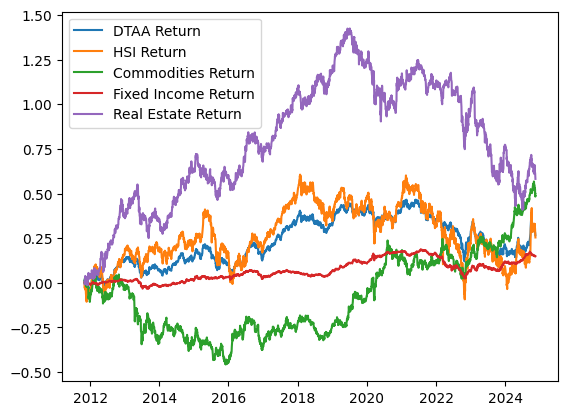

In [13]:
plt.plot(data_dtaa["portfolio_daily_return"].cumsum(), label="DTAA Return")
plt.plot(data_dtaa["HSI_daily_return"].cumsum(), label= "HSI Return")
plt.plot(data_dtaa['Gold ETF_daily_return'].cumsum(), label= "Commodities Return")
plt.plot(data_dtaa["HKD bond fund_daily_return"].cumsum(), label="Fixed Income Return")
plt.plot(data_dtaa["Link REIT_daily_return"].cumsum(), label= "Real Estate Return")
plt.legend()

In [14]:
portfolio_return = data_dtaa["portfolio_daily_return"][:-1].cumsum().iloc[-1]
print("SMA Plus Strategy Return: ", portfolio_return)
risk=data_dtaa["portfolio_daily_return"].std()
print("Sharpe Ratio is : ", data_dtaa["portfolio_daily_return"].mean() / risk * np.sqrt(250))

SMA Plus Strategy Return:  0.2670983011962632
Sharpe Ratio is :  0.20797019629196611


Text(0.5, 1.0, 'Signal Based Strategy Return')

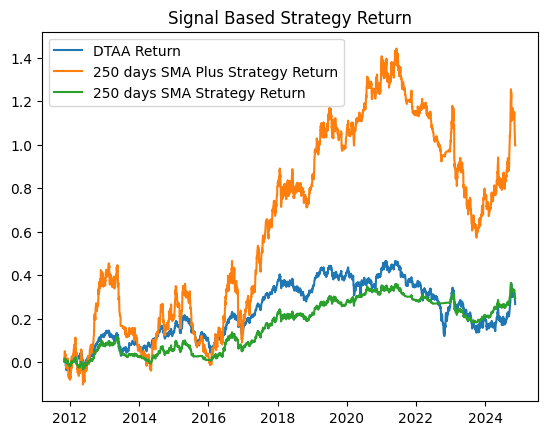

In [15]:
plt.plot(data_dtaa["portfolio_daily_return"].cumsum(), label="DTAA Return")
plt.plot(data_sma_plus["portfolio_daily_return"].cumsum(), label="250 days SMA Plus Strategy Return")
plt.plot(data_sma_return["portfolio_daily_return"].cumsum(), label="250 days SMA Strategy Return")
plt.legend()
plt.title("Signal Based Strategy Return")

Overall DTAA Strategy has outperformed 250 days SMA Strategy until the recent surge between late Sep and early Oct 2024.

It is clear that SMA Plus Strategy provides the best return without taking much higher risk.

What if I dynamically adjust the asset allocation not based on predetermined percentage but risk ? 

<b>DTAA with Risk Parity </b>

We will adjust the asset allocation weekly, no leverage and shortselling, each asset has between 0% to 100% weighting. I assume we cannot hold cash in this strategy.

In [16]:
data_risk_parity = data[::-1].copy()
for column in data_risk_parity.columns[:4]:
    name1 = column + "_daily_return"
    data_risk_parity[name1] = (data_risk_parity[column] / data_risk_parity[column].shift(1)) -1
    name2 = column + "_monthly_volatility"
    data_risk_parity[name2] = data_risk_parity[name1].rolling(window=20).std() * np.sqrt(250)

def adjust_weights(df, stocks):
    weights = pd.DataFrame(index=df.index, columns=stocks)
    for i in range(0, len(df), 7): 
        volatilities = df.loc[df.index[i], [stock + '_monthly_volatility' for stock in stocks]]
        inverse_volatility = 1 / volatilities
        total_inverse_volatility = inverse_volatility.sum()
        weekly_weights = (inverse_volatility / total_inverse_volatility).values
        n_days = min(7, len(df) - i)
        weights.iloc[i:i+n_days, :] = np.tile(weekly_weights, (n_days, 1))
    return weights

stock_columns = ['HSI', 'HKD bond fund', 'Gold ETF', 'Link REIT']
data_risk_parity=data_risk_parity[250:].copy()
weights = adjust_weights(data_risk_parity, stock_columns)

data_risk_parity['portfolio_daily_return'] = (weights * data_risk_parity[[stock + '_daily_return' for stock in stock_columns]].values).sum(axis=1)
data_risk_parity['portfolio_cumulative_return'] = data_risk_parity['portfolio_daily_return'].cumsum()

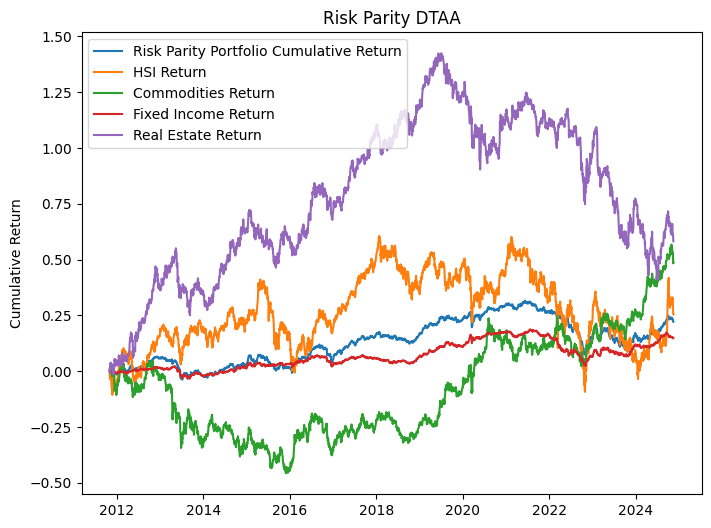

In [17]:
plt.figure(figsize=(8, 6))
plt.plot( data_risk_parity['portfolio_cumulative_return'], label='Risk Parity Portfolio Cumulative Return')
plt.plot(data_risk_parity["HSI_daily_return"].cumsum(), label= "HSI Return")
plt.plot(data_risk_parity['Gold ETF_daily_return'].cumsum(), label= "Commodities Return")
plt.plot(data_risk_parity["HKD bond fund_daily_return"].cumsum(), label="Fixed Income Return")
plt.plot(data_risk_parity["Link REIT_daily_return"].cumsum(), label= "Real Estate Return")
plt.title('Risk Parity DTAA')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

In [18]:
portfolio_return = data_risk_parity["portfolio_daily_return"].cumsum().iloc[-1]
print("SMA Plus Strategy Return: ", portfolio_return)
risk=data_risk_parity["portfolio_daily_return"].std()
print("Sharpe Ratio is : ", data_risk_parity["portfolio_daily_return"].mean() / risk * np.sqrt(250))

SMA Plus Strategy Return:  0.22128805642294133
Sharpe Ratio is :  0.3377582747794101


Risk Parity DTAA can reduce the volatility of the portfolio but has worse return compared with HSI and other strategies.

<h1><b>Conclusion</b>

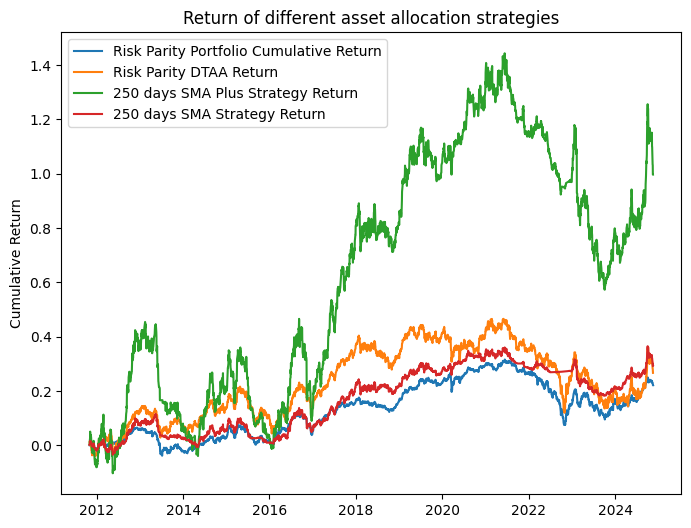

In [19]:
plt.figure(figsize=(8, 6))
plt.plot( data_risk_parity['portfolio_cumulative_return'], label='Risk Parity Portfolio Cumulative Return')
plt.plot(data_dtaa["portfolio_daily_return"].cumsum(), label="Risk Parity DTAA Return")
plt.plot(data_sma_plus["portfolio_daily_return"].cumsum(), label="250 days SMA Plus Strategy Return")
plt.plot(data_sma_return["portfolio_daily_return"].cumsum(), label="250 days SMA Strategy Return")
plt.title('Return of different asset allocation strategies')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

By looking at the performance chart, we can come up with a conclusion that by using a 250 days SMA Plus Strategy to adjust portfolio weighting of different asset classes in HK market, we can achieve better return by holding more uptrend assets. 

But when multiple assets fall together from late 2021 to 2023 as the inflation threatened the market led to exponential increase of interest rate along with China policies in COVID-19, everything dropped alot. Since the bond market has been bullish for more than 30 years, having fixed income assets in the portfolio can reduce risk of the portfolio and protect against market crash. Now the long term bond bullish market has ended?? Should we give up the idea of holding fixed income assets into our portfolio to reduce risk as they are very volatile last few years.

I think we can imporve those strategies return by:

1. Select fixed income products that are less volatile such as short term bills or treasury floating rate notes, or simply use money market fund. We can see during the interest rate hike, huge capital inflow to short term fixed income products. As most people predict next year when Trump crown himself as US President, he will impose many tariff and lead to a global trade wars thus inflation will go up again. Having fixed income assets that will benefit from that potential inflation but also will not suffer a lot if no inflation is important.

2. Hong Kong market is famous for sentiment driven, suddenly there is some news/rumor so market go up exponentially for many days and if you don't harvest profit quickly... During that period the short term volatility becomes way higher than long term volatility, thus limiting the expourse and upside return. I think the logic SMA Plus Strategy is to hold less in overshoot and hold more during oversold. But is that match the characteristics of HK market? <b>Take the recent short term euphoria in HK, if you follow the SMA Plus Strategy, you will buy less in the uptrend, and late to cash out all equities position after it crash. </b> And by ignoring those short term euphoria in the whole backtest period, we see HSI is just range trading with low volatility. Maybe we do the opposite, if short term volatility is higher than long term volatility by XX%, we buy more??

3. The DTAA main drawbacks are (1) assuming equities and other asset classes are negatively correlated & (2) no option for holding cash. The DTAA asset allocation weightings may only work in normal uptrend market. We may (1) add holding cash option (2)  instead of considering one aggregate signal and volatility of the portfolio and determine weigthings within the framework, we also consider individual assets performance, such as the gold price is going up crazy, if the DTAA allows shifting more weightings from other assets to gold not just capped at 15%, it will greatly imporve the return of the portfolio.

4. We can choose a different investment environment? It is obvious that the strategies performance of this thesis are much better than mine as he use US market to backtest.


